# Exploratory Data Analysis 

#### QUESTION: Which independent variables are associated with re-admission?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('/Users/secil/Documents/WGU-MSDA/D207-ExploratoryDA/cleaned_medicaldata/medical_clean.csv')
pd.set_option('display.max_columns', None)

In [4]:
df.head(3)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.40342,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.99812,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.19246,2,4,4,4,3,4,3,3


In [5]:
df.shape

(10000, 50)

In [6]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [7]:
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [8]:
# Dropping the columns I will not be conducting a test on
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'TimeZone','Job'], axis=1)
df.columns

Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

## Data Exploration

In [9]:
# Find the data types for each variable
df.dtypes

Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety                object
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Services               object
Initial_days          float64
TotalCharge           float64
Additional_charges    float64
Item1                   int64
Item2                   int64
Item3                   int64
Item4                   int64
Item5                   int64
Item6     

In [10]:
# Find the number of unique values for each column
df.nunique()

Children                11
Age                     72
Income                9993
Marital                  5
Gender                   3
ReAdmis                  2
VitD_levels           9976
Doc_visits               9
Full_meals_eaten         8
vitD_supp                6
Soft_drink               2
Initial_admin            3
HighBlood                2
Stroke                   2
Complication_risk        3
Overweight               2
Arthritis                2
Diabetes                 2
Hyperlipidemia           2
BackPain                 2
Anxiety                  2
Allergic_rhinitis        2
Reflux_esophagitis       2
Asthma                   2
Services                 4
Initial_days          9997
TotalCharge           9997
Additional_charges    9418
Item1                    8
Item2                    7
Item3                    8
Item4                    7
Item5                    7
Item6                    7
Item7                    7
Item8                    7
dtype: int64

## Chi-square tests

In [11]:
df['Initial_days_int']=df['Initial_days'].astype(int)
df['Initial_days_int'].describe()

count    10000.000000
mean        33.956000
std         26.301628
min          1.000000
25%          7.000000
50%         35.500000
75%         61.000000
max         71.000000
Name: Initial_days_int, dtype: float64

In [12]:
#** some code is copied from this source: https://www.absentdata.com/pandas/pandas-cut-continuous-to-categorical/

df['Initial_days_cat'] = df['Initial_days']
df['Initial_days_cat']=pd.cut(df['Initial_days_cat'], bins=[0,10,30,60,72], 
                              labels=['0-10 days','10-30 days','30-60 days','60-72 days'])

In [13]:
ct = pd.crosstab(df['Initial_days_cat'],df['ReAdmis'])#, margins=True  -> gives the total
print(ct)

ReAdmis             No   Yes
Initial_days_cat            
0-10 days         3091     0
10-30 days        1888     0
30-60 days        1352   971
60-72 days           0  2698


In [14]:
alpha=0.05
chi2, p, dof, expected = stats.chi2_contingency(ct)
print(f"statistic: {chi2}\np-value: {p}\ndegrees of freedom: {dof}\nexpected: {expected}\n")
if p < alpha:
    print('Readmission is dependent on Initial days (reject H0)')
else:
    print('Readmission is independent of Initial days (fail to reject H0)')

statistic: 7567.0863982051205
p-value: 0.0
degrees of freedom: 3
expected: [[1956.9121 1134.0879]
 [1195.2928  692.7072]
 [1470.6913  852.3087]
 [1708.1038  989.8962]]

Readmission is dependent on Initial days (reject H0)


In [15]:
ct2 = pd.crosstab(df['Services'],df['ReAdmis'])
print(ct2)

ReAdmis        No   Yes
Services               
Blood Work   3335  1930
CT Scan       737   488
Intravenous  2027  1103
MRI           232   148


In [16]:
alpha=0.05
chi2, p, dof, expected = stats.chi2_contingency(ct2)
print(f"statistic: {chi2}\np-value: {p}\ndegrees of freedom: {dof}\nexpected: {expected}\n")
if p < alpha:
    print('Readmission is dependent on Services (reject H0)')
else:
    print('Readmission is independent of Services (fail to reject H0)')

statistic: 8.892645054628435
p-value: 0.03075281113212747
degrees of freedom: 3
expected: [[3333.2715 1931.7285]
 [ 775.5475  449.4525]
 [1981.603  1148.397 ]
 [ 240.578   139.422 ]]

Readmission is dependent on Services (reject H0)


## Univariate Statistics and Distributions 

#### Continous Variables

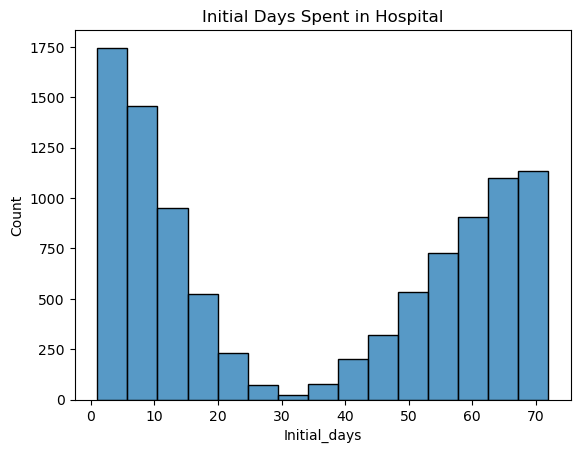

In [17]:
sns.histplot(data=df, x='Initial_days')
plt.title('Initial Days Spent in Hospital');
plt.savefig('Initial_days.png')

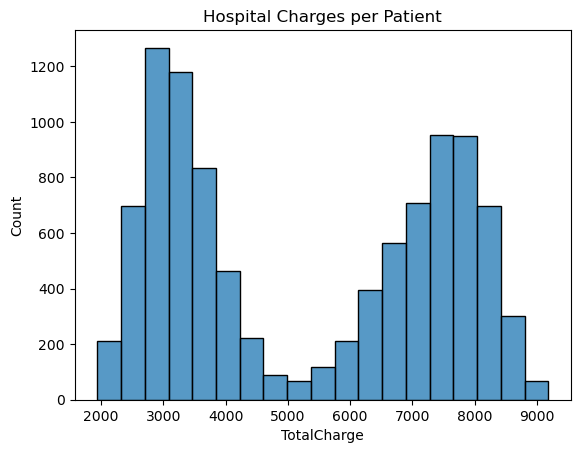

In [18]:
sns.histplot(data=df, x='TotalCharge')
plt.title('Hospital Charges per Patient');
plt.savefig('TotalCharge.png')

#### Categorical Variables

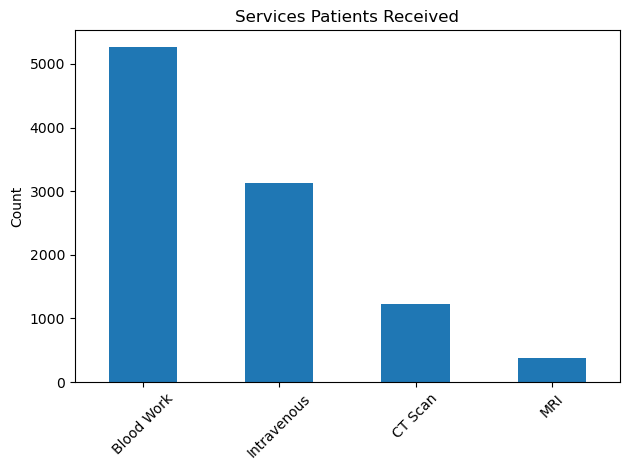

In [19]:
df['Services'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Services Patients Received')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Services.png');

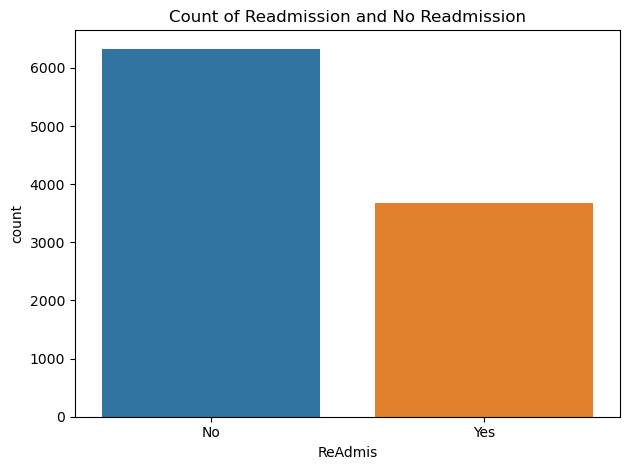

In [20]:
sns.countplot(data=df,x='ReAdmis')
plt.title('Count of Readmission and No Readmission')
plt.tight_layout()
plt.savefig('Readmission.png');

## Bivariate Statistics and Distributions 

#### Continous

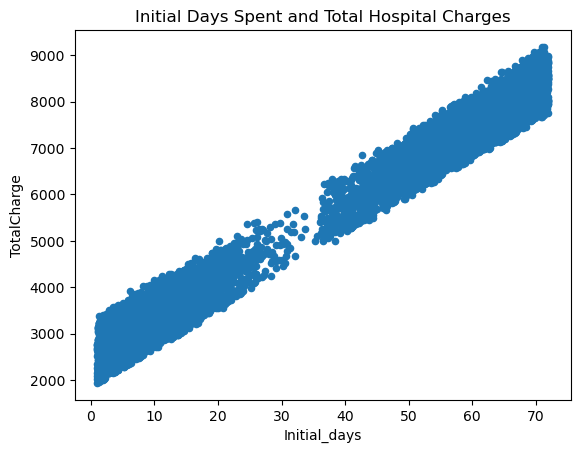

In [21]:
df.plot(x='Initial_days',y='TotalCharge', kind='scatter')
plt.title('Initial Days Spent and Total Hospital Charges')
plt.savefig('Days_Charges.png');

#### Categorical

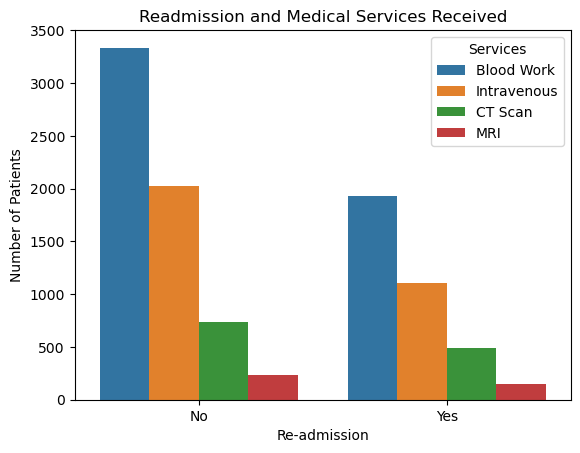

In [22]:
sns.countplot(data=df, x='ReAdmis', hue='Services')
plt.title('Readmission and Medical Services Received')
plt.xlabel('Re-admission')
plt.ylabel('Number of Patients');
plt.savefig('Readmis_Services.png')

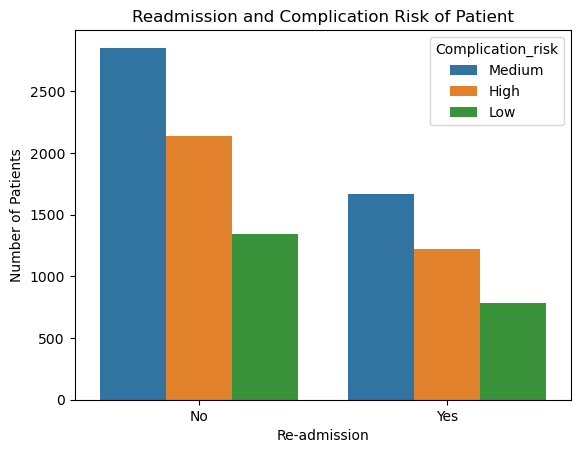

In [23]:
sns.countplot(data=df, x='ReAdmis', hue='Complication_risk')
plt.title('Readmission and Complication Risk of Patient')
plt.xlabel('Re-admission')
plt.ylabel('Number of Patients');
plt.savefig('Readmis_Comp.png')

#### Continous and Categorical variables

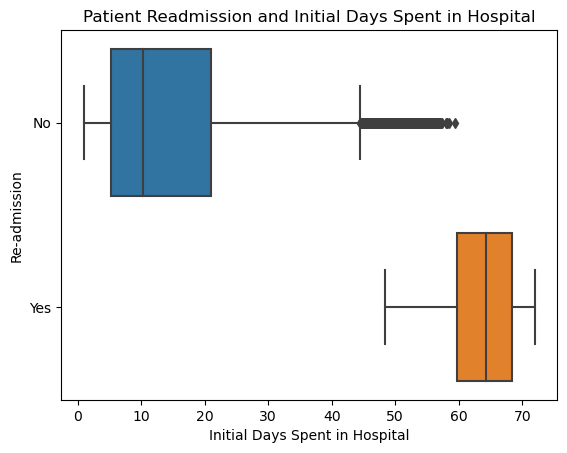

In [24]:
sns.boxplot(x='Initial_days', y='ReAdmis',data=df)
plt.title('Patient Readmission and Initial Days Spent in Hospital')
plt.xlabel('Initial Days Spent in Hospital')
plt.ylabel('Re-admission');
plt.savefig('days_admis.png')

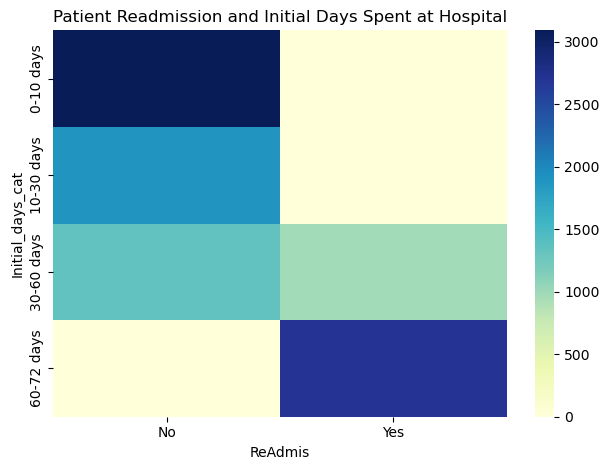

In [25]:
sns.heatmap(ct, cmap='YlGnBu');
plt.title('Patient Readmission and Initial Days Spent at Hospital')
plt.tight_layout();
plt.savefig('Heatmap_readmisdays.png')